<a href="https://colab.research.google.com/github/nlahri/dsba6211-summer2024/blob/main/notebooks/dsba6211_summer2024_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This assignment you are to partially use ChatGPT or LLM's but only for Problems 3 and 6 which are to aid you in interpreting the results. You are not to use ChatGPT or another LLM for Problems 1, 2, 4, 5 and 7. For those, you are to use the [reference material](https://cienciadedatos.net/documentos/py51-arima-sarimax-models-python.html) provided in class.**

# Dependencies

In [1]:
%%capture
!pip install skforecast
!pip install pmdarima

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima
# skforecast
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from skforecast.datasets import fetch_dataset
# statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Data

In [12]:
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1138&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ENPLANE&scale=left&cosd=2000-01-01&coed=2024-02-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-06-27&revision_date=2024-06-27&nd=2000-01-01"

df = pd.read_csv(url, index_col=0, parse_dates=True)
df.head()

,ENPLANE
DATE,
2000-01-01,46492.0
2000-02-01,48526.0
2000-03-01,58764.0
2000-04-01,56032.0
2000-05-01,58201.0


In [13]:
# filter df only by 2010 to 2020
df = df['2010-01-01':'2019-12-31']

Train dates : 2010-01-01 00:00:00 --- 2018-12-01 00:00:00  (n=108)
Test dates  : 2019-01-01 00:00:00 --- 2019-12-01 00:00:00  (n=12)


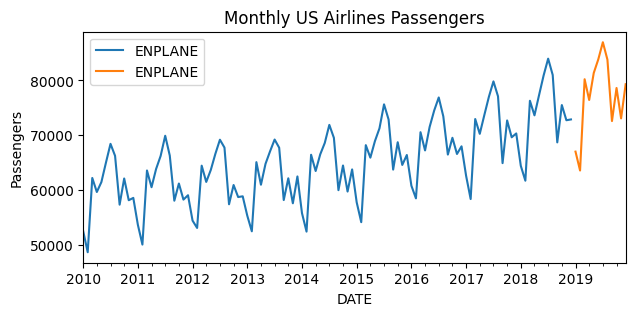

In [14]:
end_train = '2018-12-31 23:59:59'
print(
    f"Train dates : {df.index.min()} --- {df.loc[:end_train].index.max()}  "
    f"(n={len(df.loc[:end_train])})"
)
print(
    f"Test dates  : {df.loc[end_train:].index.min()} --- {df.loc[:].index.max()}  "
    f"(n={len(df.loc[end_train:])})"
)
data_train = df.loc[:end_train]
data_test  = df.loc[end_train:]

# Plot
# ======================================================================================
fig, ax=plt.subplots(figsize=(7, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.set_title('Monthly US Airlines Passengers')
ax.set_ylabel('Passengers')
ax.legend();

Your goal is to develop a time series forecasting model for 2019 using 2010-2018 data as training.

# Problem 1: Visualizing Stationarity (No ChatGPT/LLM)

Use [this code](https://cienciadedatos.net/documentos/py51-arima-sarimax-models-python.html#Stationarity) to plot the train (2010-2018) data and the first/second order differences.

Use the code provided - **do not use ChatGPT** as it may provide alternative libraries code.

**Question**: What order (no difference, 1st order, or 2nd order) should you use to make the time series stationary?

Write 1-2 sentences justifying your answer.

Remember - you want to select the order that looks like it doesn't have any discernable patterns.

You do not need to run any statistical tests, but you can if you want further evidence.

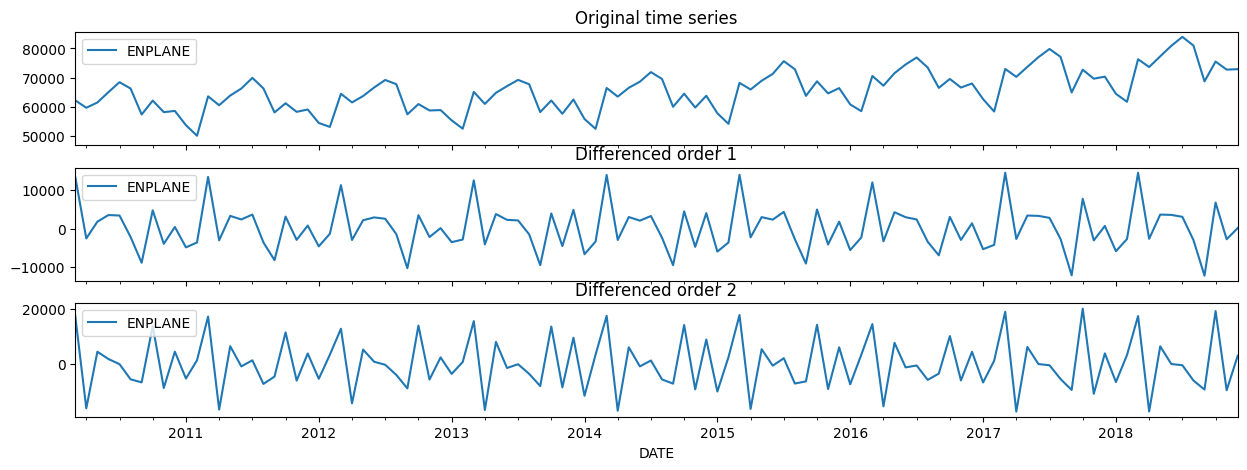

In [20]:
# add code here


data_diff_1 = data_train.diff().dropna()
data_diff_2 = data_diff_1.diff().dropna()

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 5), sharex=True)
data_train.plot(ax=axs[0], title='Original time series')
data_diff_1.plot(ax=axs[1], title='Differenced order 1')
data_diff_2.plot(ax=axs[2], title='Differenced order 2');


No differece series shows an up ward trend. So diffrencing it once de definetly get rid of this upward trend. According to me the second differencing does not make a lot of difference. So I will go with one differenced sereis.

## Problem 2: ARIMA(1,d,1) (No ChatGPT/LLM)

Set up a ARIMA(1,d,1), where d is the order you selected in Problem 1.

- Use [`skforecast`](https://cienciadedatos.net/documentos/py51-arima-sarimax-models-python.html#Skforecast) (i.e., `Sarimax`) for ARIMA -- again, don't use ChatGPT as it may use a different library.

- Do not add any seasonal differences at this time (that is, do not provide values to `seasonal_order`)

Fit and run a summary stats on this model.

In [44]:
# add code here
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
arima = Sarimax(order=(1, 1, 1))
arima.fit(y=data_train)
arima.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                ENPLANE   No. Observations:                  108
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1074.680
Date:                Tue, 16 Jul 2024   AIC                           2155.359
Time:                        01:49:58   BIC                           2163.378
Sample:                    01-01-2010   HQIC                          2158.610
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3647      0.216     -1.687      0.092      -0.788       0.059
ma.L1          0.1649      0.234      0.705      0.481      -0.294       0.623
sigma2      2.952e+07   6.23e-09   4.73e+15      0.000    2.95e+07    2.95e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                 3.24
Prob(Q):                              0.30   Prob(JB):                         0.20
Heteroskedasticity (H):               1.32   Skew:                             0.29
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.48e+31. Standard errors may be unstable.
"""

## Problem 3: Interpretation (You may use ChatGPT/LLM)

Now interpret the results of your model from Problem 2.

For this, you **may** use ChatGPT or another LLM but you **must** provide your Share Link of your chat.

Assess your model's results - does it seem like your model fits the data well?

Answer: The lack of significance in the AR and MA terms suggests it might not be the best fit. Although, the model does not show significant issues with residuals.  JB test, Heteroskedasticity, skew, kurtosis are all as expected for normality.  I will consider exploring other model specifications and adding seasonlity to improve the model fit.

ChatGPT coversation refrence here https://chatgpt.com/share/ef0df43e-6b01-4800-af3d-85ac15fd8098

## Problem 4: ACF and PACF Plots (No ChatGPT/LLM)

Again, use [this code](https://cienciadedatos.net/documentos/py51-arima-sarimax-models-python.html#Autocorrelation-Analysis) and run ACF and PACF plots on the 0 (no difference), 1st, and 2nd order of your data. **Use the code in the plot** and don't use ChatGPT or else you may get different results.

Given your ACF and PACF plots for the order you choose in Problem 1: do you notice any seasonality patterns?

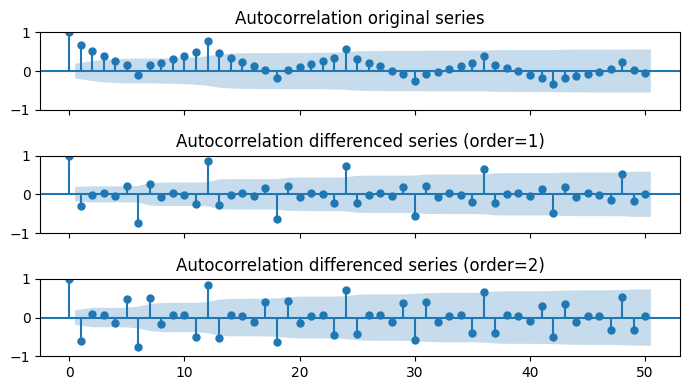

In [33]:
# add in code for ACF
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 4), sharex=True)

plot_acf(data_train, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelation original series')

plot_acf(data_diff_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autocorrelation differenced series (order=1)');

plot_acf(data_diff_2, ax=axs[2], lags=50, alpha=0.05)
axs[2].set_title('Autocorrelation differenced series (order=2)' );

plt.tight_layout()


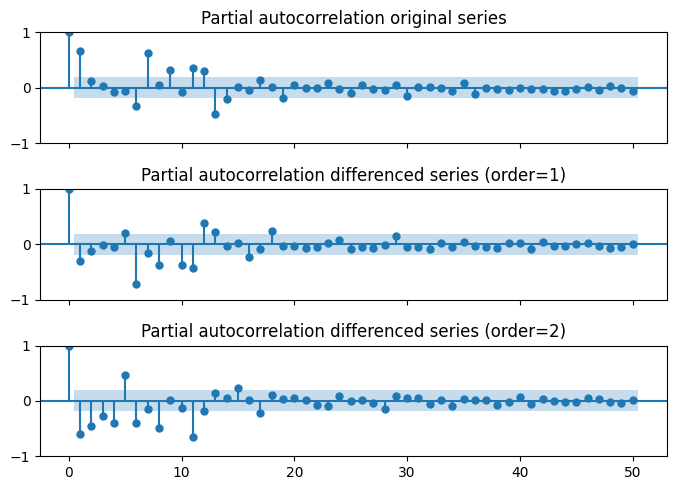

In [37]:
# add in code for PACF

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 5), sharex=True)

plot_pacf(data_train, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Partial autocorrelation original series')

plot_pacf(data_diff_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Partial autocorrelation differenced series (order=1)');

plot_pacf(data_diff_2, ax=axs[2], lags=50, alpha=0.05)
axs[2].set_title('Partial autocorrelation differenced series (order=2)');
plt.tight_layout();

Answer: Looking at the ACF plot there is a strong relationship between the at lag 6 and 12. I will proceed witha value of 12 for s.

## Problem 5: Add in Seasonality Order (No ChatGPT/LLM)

Based on your answer for Problem 3, build a 2nd model and add in a `seasonal_order(1, 1, 1, s)` where `s` is the seasonal periodicity you decided from Problem 3.

In [43]:
# add in code

warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
arima2 = Sarimax(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima2.fit(y=data_train)
arima2.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            ENPLANE   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -818.624
Date:                            Tue, 16 Jul 2024   AIC                           1647.248
Time:                                    01:49:49   BIC                           1660.018
Sample:                                01-01-2010   HQIC                          1652.408
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1074      1.224      0.088      0.930      -2.292       2.507
ma.L1         -0.2003      1.228     -0.163      0.870      -2.608       2.207
ar.S.L12       0.2860      0.367      0.780      0.435      -0.432       1.004
ma.S.L12      -0.3698      0.376     -0.983      0.326      -1.107       0.367
sigma2      1.698e+06   1.67e+05     10.185      0.000    1.37e+06    2.02e+06
===================================================================================
Ljung-Box (L1) (Q):                  23.34   Jarque-Bera (JB):                26.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                             0.01
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Problem 6: Use ChatGPT to compare and interpret both plots

- Create a prompt to compare the results of both Model 1 and Model 2.

- Provide the ChatGPT shared link.

- Based on the model statistics, which model fits the training data better?

- What factors should you also consider when making model selection?

Prompt: Based on your sugestion to explore more model specification I tried another model. Here is the model summary of it on the same input data.
Can you compare the two model objectively and tell which better and why?

ChatGPT link: https://chatgpt.com/share/ef0df43e-6b01-4800-af3d-85ac15fd8098

Based in the model stats of loglikelihood, AIC, BIC with gives the information on model fit, Model 2 is clearly a winner.

Althouhg, Model 1 has more normally distributed residue. So if the residual behavior is more critical for your analysis, Model 1 may be preferable. If model fit criteria (AIC, BIC, HQIC) are prioritized, Model 2 may be better despite the residual issues.



## Problem 7: Forecasting (No ChatGPT/LLM)

Now use the code below to use your models to forecast for 2019.

The code below assumes your models have the following:
1. Model 1 is named `arima`
2. Model 2 (with seasonality) is named `arima2`

Modify these accordingly to predict your data.

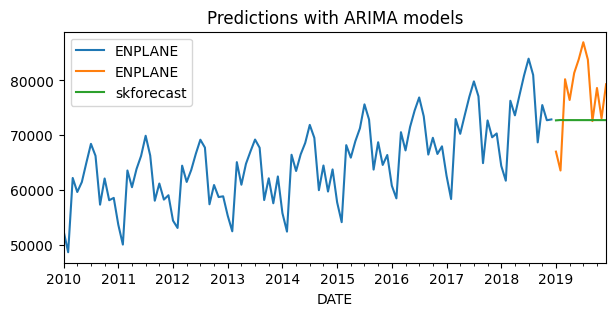

In [47]:
predictions_skforecast = arima.predict(steps=len(data_test))
predictions_skforecast.columns = ['skforecast']

fig, ax = plt.subplots(figsize=(7, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions_skforecast.plot(ax=ax, label='skforecast')
ax.set_title('Predictions with ARIMA models')
ax.legend();

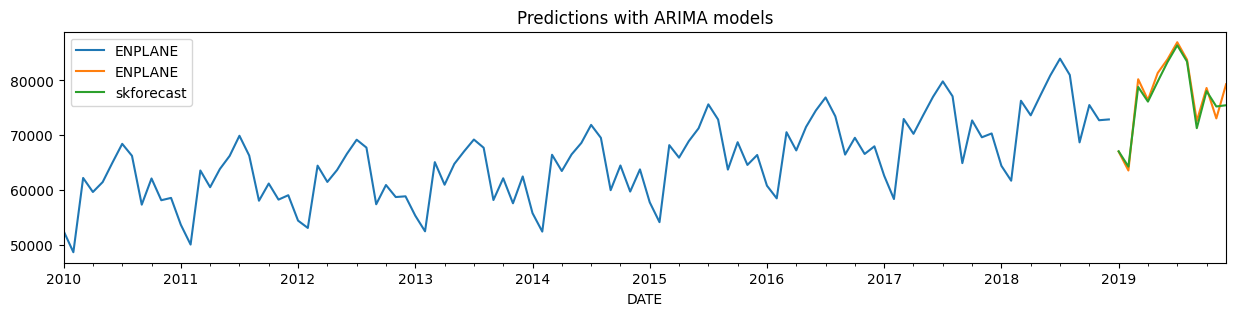

In [48]:
predictions_skforecast2 = arima2.predict(steps=len(data_test))
predictions_skforecast2.columns = ['skforecast']
fig, ax = plt.subplots(figsize=(15, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions_skforecast2.plot(ax=ax, label='skforecast')
ax.set_title('Predictions with ARIMA models')
ax.legend();

Answer these questions, each in 1-2 sentences:

- What is the difference between the two models forecast?

- Visually, which of the two models seem to fit your data out-of-sample (test/2019) data better?

- What are problems you still visualize with your selected model?

1. arima forcast is a straight line for the entire year of 2019. where as arima2 captures the seasonal pattern beautifully
2. Visualy Model 2 or arima2 is  clearn winner
3. arima2 model is not fitting the actuall data towards the end of 2019. This indicates once the prediction horizon becomes bigger quality of prediction is going down.